连接数据库!
Completion of data reading 


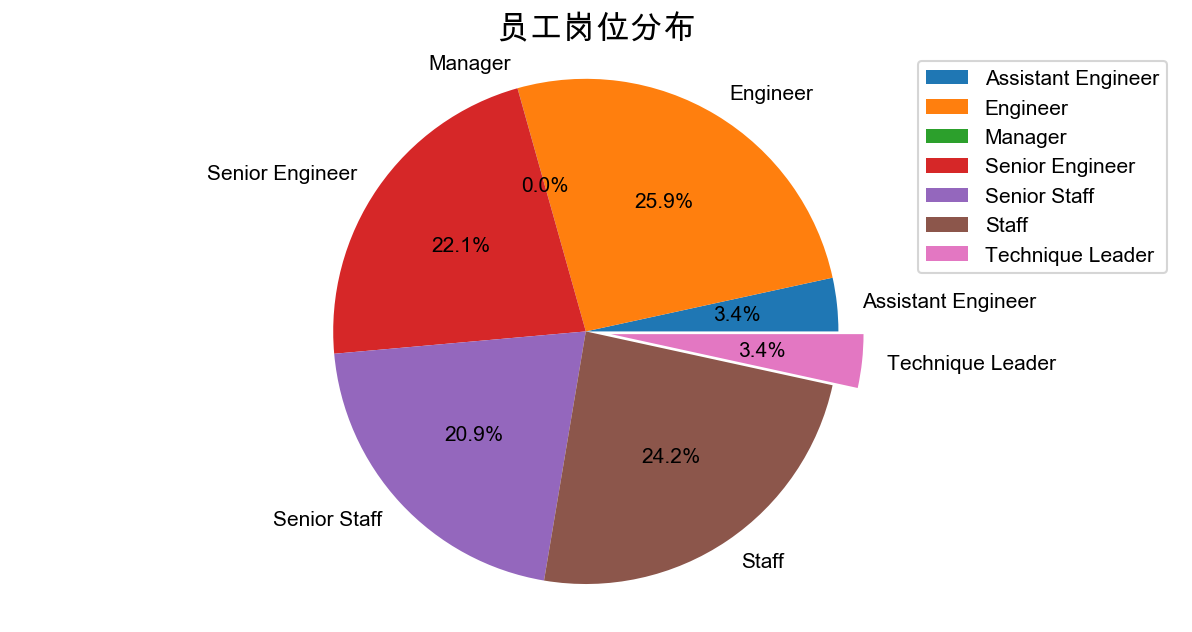

连接数据库!


In [ ]:
#!/usr/bin/python3
# %matplotlib inline  作用是将Matplotlib绘制的图形内嵌在Jupyter Notebook的页面中，无需执行命令plt.show()便可以直接在页面内展示绘制的图形。

%matplotlib inline 
import pymysql
import time
import matplotlib.pyplot as plt

def get_content_from_db(sql):
    print('连接数据库!')
    dbhost='127.0.0.1'
    dbuser='root'
    dbpass='123456'
    dbname='employees'
     # 创建数据库连接
    db = pymysql.connect(host=dbhost,user=dbuser,password=dbpass,database=dbname,charset = "utf8mb4")
    try:
         # 使用cursor()方法获取操作游标 
        cursor = db.cursor()
        # 执行SQL语句
        cursor.execute(sql)
         # 获取所有记录列表
        results = cursor.fetchall()
        # 提交事务 
        db.commit()
    except:
        print ('Reading Error ')    
    finally:
        db.close()
    print ('Completion of data reading ')    
    return (results)

def title_show(results,title,save_file_name):
    # 准备数据
    indexList = []
    itemList = []
    for i in results:
        indexList.append(i[1])
        itemList.append(i[0])

    plt.rcParams["font.family"] = 'Arial Unicode MS' # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
  
    # 3.创建画布
    plt.figure(figsize=(10, 5), dpi=150)

    # 4.绘制饼图
    explode = (0, 0, 0, 0, 0, 0, 0.1)  # 突出展示【其他】手机部分
    plt.pie(indexList, labels=itemList, autopct="%1.1f%%", explode=explode)
   
    # 5.修饰图像
    plt.title(title, fontsize=16)  # 添加标题
    plt.axis("equal")  # 修正饼图的展示效果
    plt.legend()
    plt.savefig(save_file_name+'.png',facecolor='white',dpi= 200)
    plt.show()

# 统计职位分布
sql_1 = """SELECT  title , COUNT(*) AS count FROM employees.titles GROUP BY title"""
results = get_content_from_db(sql_1)
title_show(results,"员工岗位分布",'title')
# 薪资区间统计
sql_2 = """
SELECT ELT(INTERVAL(salary, 30000, 50000, 70000, 90000, 110000, 130000, 150000), 
    '<30000', '30000-50000', '50000-70000', '70000-90000', '90000-110000', '110000-130000', '>=150000')
AS salary_level, count(*) AS count FROM employees.salaries GROUP BY salary_level
"""
results = get_content_from_db(sql_2)
title_show(results,"员工工资分布",'salaries')


